In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pytz
import numpy as np
from matplotlib.patches import Rectangle
from IPython.display import display

kilburn = [30,31,32,33]

bookings = pd.read_json("../../chatbot_data/bookings/bookings13-11-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

# switch to a faster method of parsing datetime strings by inferring the format
bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True).dt.floor('S')
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True).dt.floor('S')
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True).dt.floor('S')

coordinationStartDate = datetime.datetime(2023,10,18,0,0,0,0,tzinfo=pytz.timezone('UTC'))
validBookings = bookings.loc[bookings['start']>= coordinationStartDate] 

klbBookings = validBookings.loc[validBookings['user'].isin(kilburn)].copy() 
klbBookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
127,2023-10-20 11:00:00+00:00,5400,laundry,None,yes,0.474828,32,electricity_consumption,30,2023-10-19 22:06:27+00:00,2023-10-19 22:06:27+00:00
129,2023-10-20 10:00:00+00:00,4800,laundry,None,yes,0.360819,23,electricity_consumption,32,2023-10-20 08:54:59+00:00,2023-10-20 08:54:59+00:00
131,2023-10-20 16:00:00+00:00,3600,oven,None,yes,0.488376,32,electricity_consumption,30,2023-10-20 11:03:48+00:00,2023-10-20 11:03:48+00:00
134,2023-10-20 17:00:00+00:00,3600,dishwasher,None,yes,0.461472,23,electricity_consumption,32,2023-10-20 16:54:07+00:00,2023-10-20 16:54:07+00:00
139,2023-10-21 10:00:00+00:00,3600,laundry,None,yes,0.270614,23,electricity_consumption,32,2023-10-21 09:30:04+00:00,2023-10-21 09:30:04+00:00
...,...,...,...,...,...,...,...,...,...,...,...
260,2023-11-08 13:00:00+00:00,7200,laundry,,no,1.320000,31,electricity_consumption,31,2023-11-08 12:37:19+00:00,2023-11-08 12:37:19+00:00
261,2023-11-09 09:00:00+00:00,3600,hob,,yes,0.350000,32,electricity_consumption,30,2023-11-08 17:39:59+00:00,2023-11-08 17:39:59+00:00
262,2023-11-08 19:45:00+00:00,3600,dishwasher,Don’t want to do it too late,somewhat,0.460000,23,electricity_consumption,32,2023-11-08 19:33:53+00:00,2023-11-08 19:33:53+00:00
263,2023-11-09 08:00:00+00:00,3600,dishwasher,,no,0.450000,31,electricity_consumption,31,2023-11-09 07:54:20+00:00,2023-11-09 07:54:20+00:00


85 bookings were made in total.


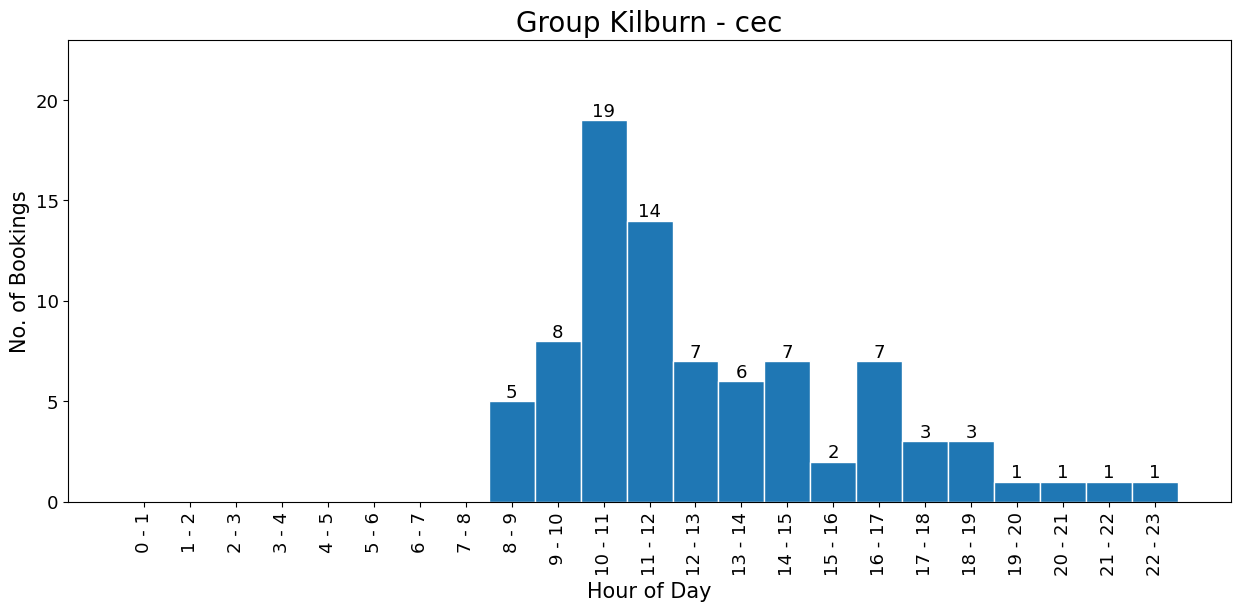

In [5]:
# Extract the hour from 'start'
klbBookings['hour'] = klbBookings['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(klbBookings['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(15, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Group Kilburn - cec", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(klbBookings)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 23  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('cec_group_kilburn_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

29 bookings were made in total.


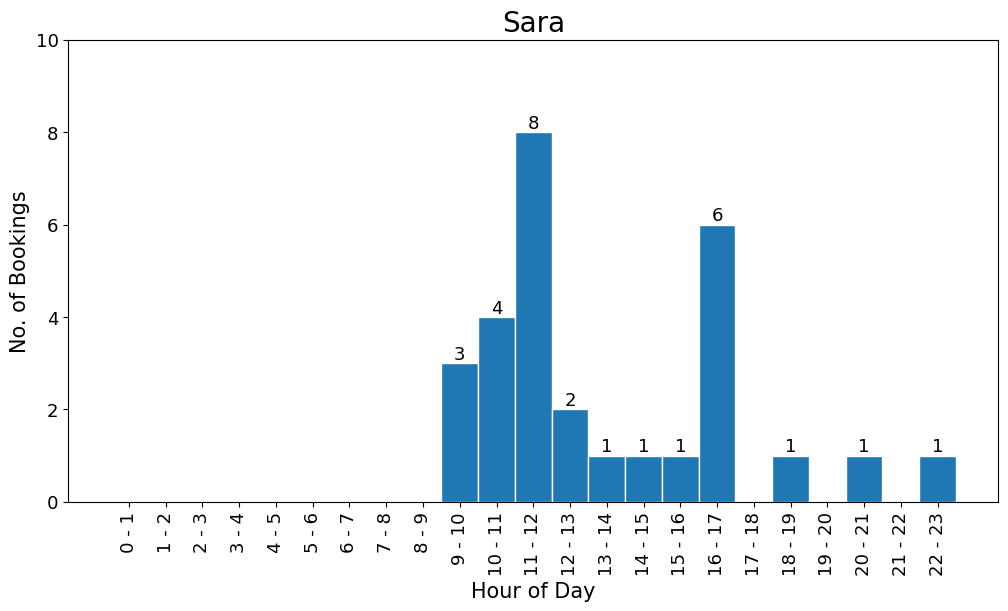

In [6]:
# User 30

bookingsUser30 = klbBookings.loc[klbBookings['user'] == 30].copy()

# Extract the hour from 'start'
bookingsUser30['hour'] = bookingsUser30['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser30['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Sara", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser30)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('sara_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

23 bookings were made in total.


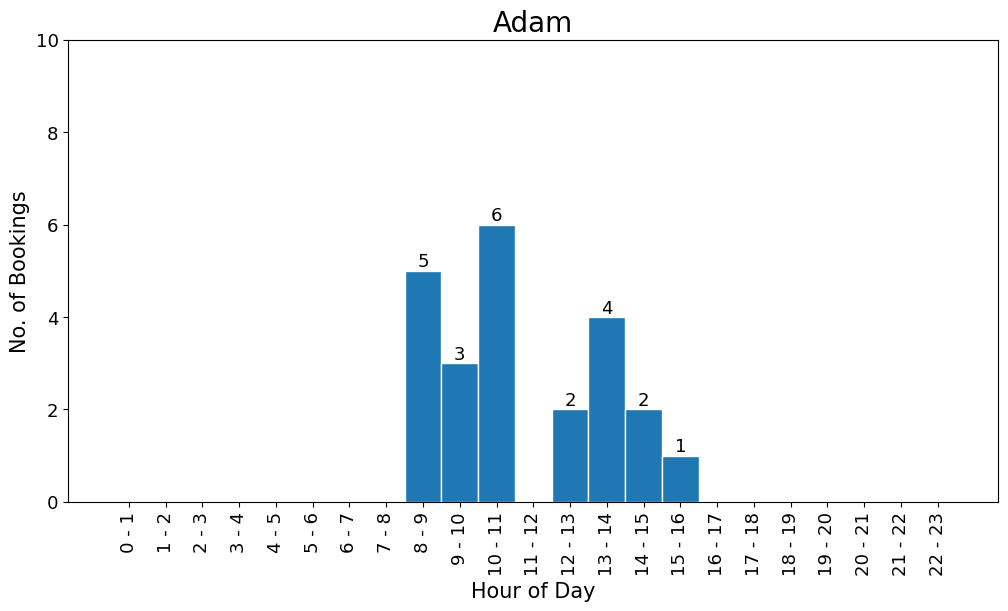

In [7]:
# User 31

bookingsUser31 = klbBookings.loc[klbBookings['user'] == 31].copy()

# Extract the hour from 'start'
bookingsUser31['hour'] = bookingsUser31['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser31['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Adam", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser31)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('adam_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

28 bookings were made in total.


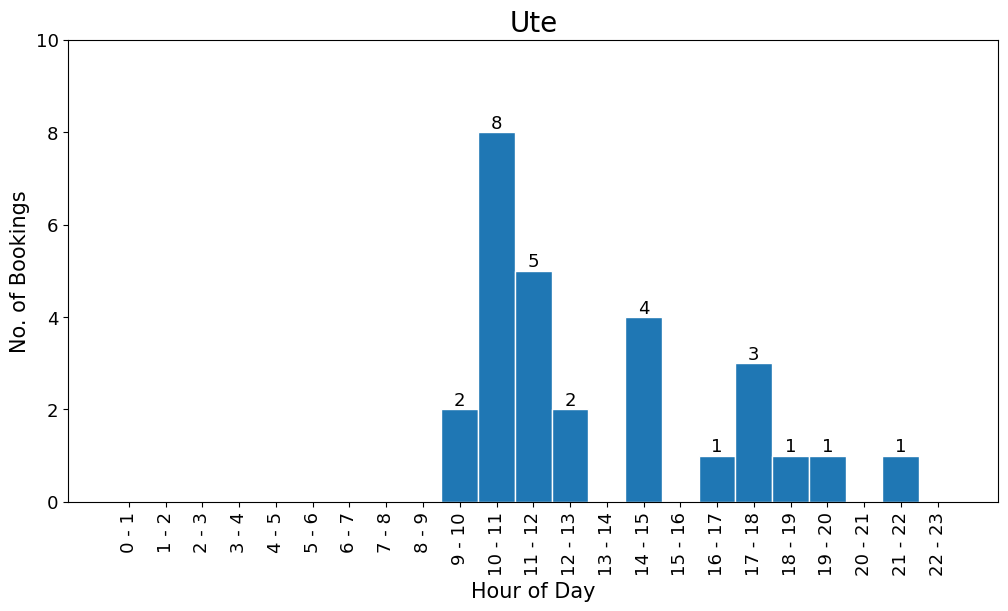

In [8]:
# User 32

bookingsUser32 = klbBookings.loc[klbBookings['user'] == 32].copy()

# Extract the hour from 'start'
bookingsUser32['hour'] = bookingsUser32['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser32['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Ute", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser32)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('ute_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

5 bookings were made in total.


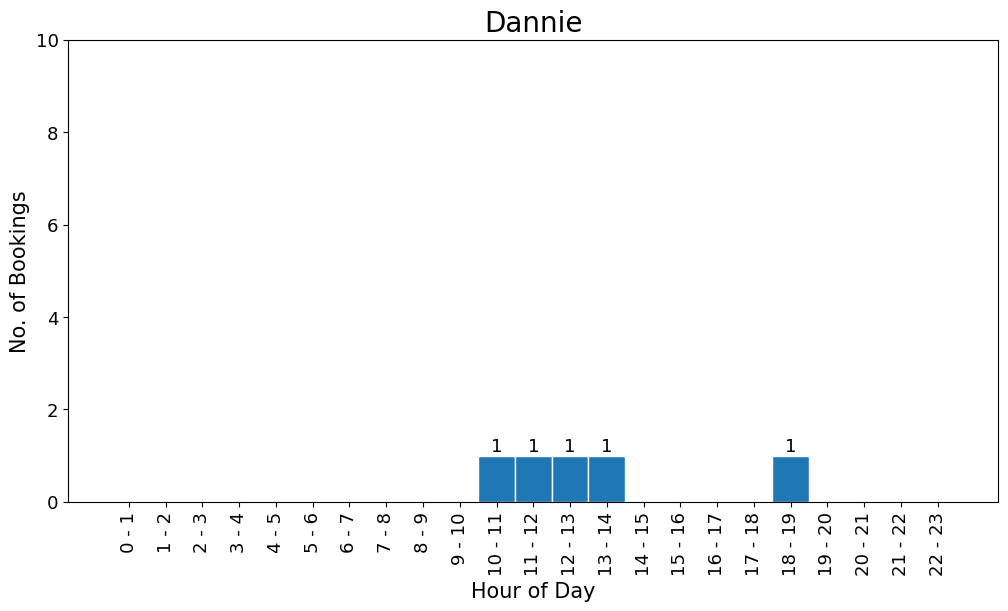

In [9]:
# User 33

bookingsUser33 = klbBookings.loc[klbBookings['user'] == 33].copy()

# Extract the hour from 'start'
bookingsUser33['hour'] = bookingsUser33['start'].dt.hour

plt.rcParams.update({'font.size': 13})

# Define bins for hours (0-23)
hour_bins = range(24)  # Include 0 to 24 (midnight to 11 PM)

# Make bookings histogram by hour
hour_hist, hour_bin_edges = np.histogram(bookingsUser33['hour'], bins=hour_bins)

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the histogram heights against integers on the x axis
hour_bars = ax.bar(range(len(hour_hist)), hour_hist, width=1, edgecolor="White")

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hour_hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(hour_bins[i], hour_bins[i+1]) for i, j in enumerate(hour_hist)], rotation = 90)

ax.set_xlabel("Hour of Day", fontsize = 15)
ax.set_ylabel("No. of Bookings", fontsize = 15)

# Add the title to the histogram
ax.set_title("Dannie", fontsize = 20)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser33)
print(total_bookings, 'bookings were made in total.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(hour_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
#     if percentage != 0:
#         ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('dannie_hourly_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()